In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


String Encoding

In [ ]:
le = LabelEncoder()
df["sex_idx"] = le.fit_transform(df["sex"])
df["smoker_idx"] = le.fit_transform(df["smoker"])
df["region_idx"] = le.fit_transform(df["region"])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_idx,smoker_idx,region_idx
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


Feature Selection

In [ ]:
X = df[["age", "sex_idx", "smoker_idx", "region_idx", "bmi", "children"]]
y = df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Train model

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Testing and Evaluate Model

In [ ]:
test_predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print("MAE: %f" % (MAE))
print("RMSE: %f" % (RMSE))

MAE: 4186.508898
RMSE: 5799.587091


In [ ]:
MAE

4186.5088983664355

In [ ]:
# Get the R-squared value
print("R2 Score: ", r2_score(y_test,test_predictions))

R2 Score:  0.7833463107364539


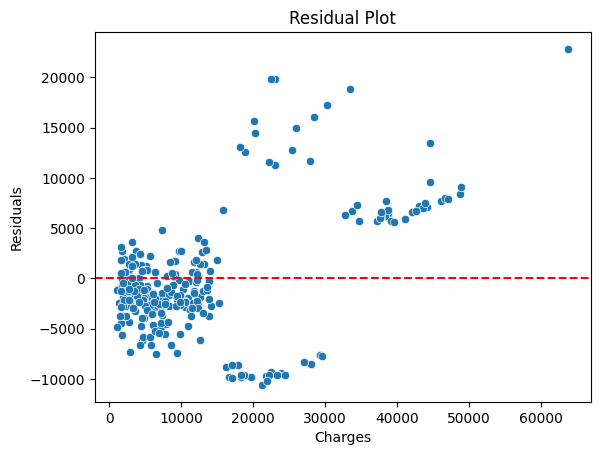

In [ ]:
residuals = y_test - test_predictions
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()